# Multi-Label Classification using Codeforces Platform 

CodeForce is a Programming language Competitive platform where Questions are posted, usually its quite challenging to come up with an approach for solving looking at the description. So, tagging for questions is essential for a better user experience. In this machine learning problem, the final goal is to predict the tag based on the Question's textual description, abbreviated as 'problem statement'.

Goal :

1)Optimize the precision and recall values of the tags predicted.

2)Hamming loss of misclassification is predicted for the tags.



In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv("/content/data.csv")
df.head()

,contest,problem_name,problem_statement,problem_tags
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500"
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800"
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600"
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900"
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,..."


In [190]:
df.shape

(8343, 4)

In [191]:
df.isnull().sum()

contest               0
problem_name          0
problem_statement     7
problem_tags         64
dtype: int64

In [192]:
#s[-1].isdigit()

s=df['problem_tags'].str.split(',').str[-1]
difficult_values=s.str.isnumeric()
count=0
for val in difficult_values:
    if(val):
        count+=1
        df['problem_difficulty']=df['problem_tags'].str.split(',').str[-1]
        df["problem_difficulty"] = df["problem_difficulty"].apply(lambda x:str(x)[1:])
        df['problem_tags_values']=df['problem_tags'].str.split(',').str[:-1]    
print(count)
df.head()

64


,contest,problem_name,problem_statement,problem_tags,problem_difficulty,problem_tags_values
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500",1500,[implementation]
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800",1800,"[binarysearch, math]"
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600",2600,"[dfsandsimilar, graphs, shortestpaths]"
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900",2900,[dsu]
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,...",2800,"[combinatorics, dfsandsimilar, dsu, graphs, gr..."


In [193]:
row_indices_to_drop = [ x for x in list(range(df.shape[0])) if df["problem_tags_values"].iloc[x] == []]

In [194]:
len(row_indices_to_drop)

437

In [195]:
df["problem_tags_values"].describe()

count     8279
unique    2177
top         []
freq       437
Name: problem_tags_values, dtype: object

In [196]:
#Drop the empty values with empty  problem tags
df = df.drop(row_indices_to_drop)

In [197]:
df["problem_tags_values"].describe()
df.head()

,contest,problem_name,problem_statement,problem_tags,problem_difficulty,problem_tags_values
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500",1500,[implementation]
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800",1800,"[binarysearch, math]"
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600",2600,"[dfsandsimilar, graphs, shortestpaths]"
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900",2900,[dsu]
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,...",2800,"[combinatorics, dfsandsimilar, dsu, graphs, gr..."


In [198]:
df = df.dropna()

In [199]:
df.shape

(7842, 6)

In [200]:
tags_dict = {}
for allTags in df["problem_tags_values"]:
    for tag in allTags :
        if tag not in tags_dict:
            tags_dict[tag] = 0 
        tags_dict[tag] += 1 

tags_dict_sorted = dict(sorted(tags_dict.items(), key = lambda x: x[1], reverse = True))
tag_count = {"Tag":list(tags_dict_sorted.keys()), "Count": list(tags_dict_sorted.values())}
count_df = pd.DataFrame(data = tag_count)
count_df[:10]

,Tag,Count
0,implementation,2199
1,math,1989
2,greedy,1943
3,dp,1668
4,datastructures,1284
5,constructivealgorithms,1176
6,bruteforce,1168
7,graphs,893
8,binarysearch,785
9,sortings,750


Text(0.5, 1.0, 'Top 20 Highest occurring Tags')

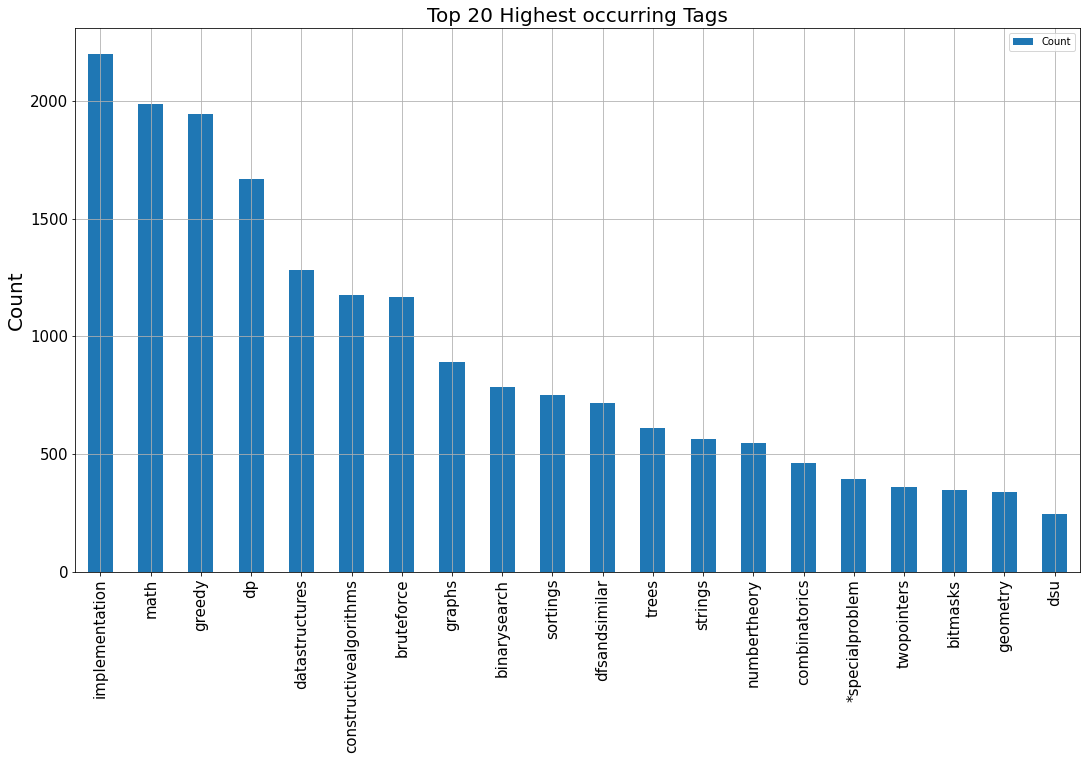

In [201]:
axes = count_df.head(20).plot(x = 'Tag', y = 'Count', kind = 'bar', figsize = (18, 10), fontsize = 15, grid = True)
plt.xlabel("")
plt.ylabel("Count", fontsize = 20)
plt.title("Top 20 Highest occurring Tags", fontsize = 20)

In [202]:
# Observations:
# Majority of the most frequent tags are implementation and maths tags

In [203]:
# df["problem_tags"] = df["problem_tags_values"]
df["problem_tags_values"] = df["problem_tags_values"].apply(lambda x:" ".join(x))

In [204]:
df.isnull().sum()
#All the null values are removed from the data-frame.

contest                0
problem_name           0
problem_statement      0
problem_tags           0
problem_difficulty     0
problem_tags_values    0
dtype: int64

In [205]:
df

,contest,problem_name,problem_statement,problem_tags,problem_difficulty,problem_tags_values
0,325,A,You are given n rectangles. The corners of rec...,"implementation,*1500",1500,implementation
1,325,B,Daniel is organizing a football tournament. He...,"binarysearch,math,*1800",1800,binarysearch math
2,325,C,Piegirl has found a monster and a book about m...,"dfsandsimilar,graphs,shortestpaths,*2600",2600,dfsandsimilar graphs shortestpaths
3,325,D,"In a far away land, there exists a planet shap...","dsu,*2900",2900,dsu
4,325,E,Piegirl found the red button. You have one las...,"combinatorics,dfsandsimilar,dsu,graphs,greedy,...",2800,combinatorics dfsandsimilar dsu graphs greedy
...,...,...,...,...,...,...
8338,1271,B,There are $$$n$$$ blocks arranged in a row and...,"greedy,math,*1300",1300,greedy math
8339,1271,C,The map of the capital of Berland can be viewe...,"bruteforce,geometry,greedy,implementation,*1300",1300,bruteforce geometry greedy implementation
8340,1271,D,"You play a strategic video game (yeah, we ran ...","datastructures,dp,greedy,implementation,sortin...",2100,datastructures dp greedy implementation sortings
8341,1271,E,"At first, let's define function $$$f(x)$$$ as ...","binarysearch,combinatorics,dp,math,*2100",2100,binarysearch combinatorics dp math


In [206]:
#Drop the column problem_tags as they are segregated into separate columns.
df = df.drop('problem_tags', 1)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 0 to 8342
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   contest              7842 non-null   int64 
 1   problem_name         7842 non-null   object
 2   problem_statement    7842 non-null   object
 3   problem_difficulty   7842 non-null   object
 4   problem_tags_values  7842 non-null   object
dtypes: int64(1), object(4)
memory usage: 367.6+ KB


In [208]:
# Check if there are duplicate data points in the Problem statement.
df2=df.groupby(df.columns.tolist(),as_index=False).size()

In [209]:
df2

,contest,problem_name,problem_statement,problem_difficulty,problem_tags_values,size
0,1,A,Theatre Square in the capital city of Berland ...,1000,math,1
1,1,B,In the popular spreadsheets systems (for examp...,1600,implementation math,1
2,1,C,Nowadays all circuses in Berland have a round ...,2100,geometry math,1
3,2,A,The winner of the card game popular in Berland...,1500,hashing implementation,1
4,2,B,"There is a square matrix n × n, consisting of ...",2000,dp math,1
...,...,...,...,...,...,...
7837,1549,C,"There are $$$n$$$ nobles, numbered from $$$1$$...",reedy,graphs,1
7838,1549,D,British mathematician John Littlewood once sai...,wopointers,binarysearch datastructures math,1
7839,1549,E,Three little pigs from all over the world are ...,ath,combinatorics dp fft,1
7840,1549,F1,This is the easy version of the problem. The o...,umbertheory,geometry,1


In [210]:
df2.groupby('size').count()

#Observation : No Duplicate data points that is denoted by the value in 1.

,contest,problem_name,problem_statement,problem_difficulty,problem_tags_values
size,,,,,
1,7842,7842,7842,7842,7842


In [211]:
# Find number of tags per question in python.

#series.apply(func) invoke function on values of Series.
df['tags_count'] = [len(i.split(" ")) for i in df["problem_tags_values"] ]
df

,contest,problem_name,problem_statement,problem_difficulty,problem_tags_values,tags_count
0,325,A,You are given n rectangles. The corners of rec...,1500,implementation,1
1,325,B,Daniel is organizing a football tournament. He...,1800,binarysearch math,2
2,325,C,Piegirl has found a monster and a book about m...,2600,dfsandsimilar graphs shortestpaths,3
3,325,D,"In a far away land, there exists a planet shap...",2900,dsu,1
4,325,E,Piegirl found the red button. You have one las...,2800,combinatorics dfsandsimilar dsu graphs greedy,5
...,...,...,...,...,...,...
8338,1271,B,There are $$$n$$$ blocks arranged in a row and...,1300,greedy math,2
8339,1271,C,The map of the capital of Berland can be viewe...,1300,bruteforce geometry greedy implementation,4
8340,1271,D,"You play a strategic video game (yeah, we ran ...",2100,datastructures dp greedy implementation sortings,5
8341,1271,E,"At first, let's define function $$$f(x)$$$ as ...",2100,binarysearch combinatorics dp math,4


In [212]:
#Find the maximum, minimum and mean tags per question.
min_tag_count = df["tags_count"].min()
max_tag_count = df["tags_count"].max()
avg_tag_count = df["tags_count"].mean()
meadian_tag_count = df["tags_count"].median()

print("Maximum tags per question:" + str(max_tag_count))
print("Minimum tags per question:" + str(min_tag_count))
print("Mean tags per question:" + str(avg_tag_count))
print("Median tags per question:" + str(meadian_tag_count))

Maximum tags per question:11
Minimum tags per question:1
Mean tags per question:2.561463912267279
Median tags per question:2.0


In [213]:
df['tags_count'].value_counts()

2     2533
3     1992
1     1709
4      994
5      401
6      157
7       39
8       15
11       1
9        1
Name: tags_count, dtype: int64

In [214]:
# Observations:
# Maximum number of tags per question: 11
# Minimum number of tags per question: 1
# Avg. number of tags per question: 2.561
# Most of the questions are having 2 or 3 tags

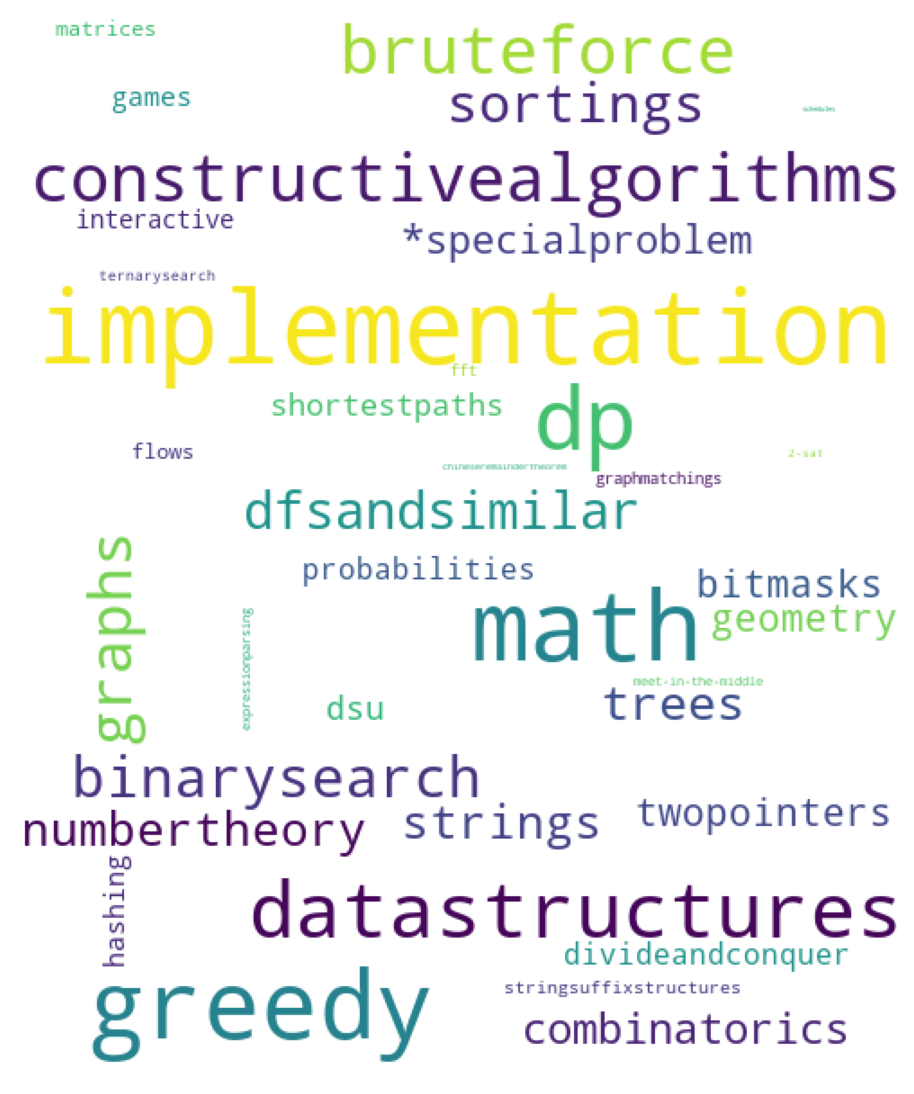

In [215]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='white',width=500,height=600,).generate_from_frequencies(dict(tags_dict_sorted.items()))
fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [216]:
df.problem_statement[5]

"Theatre Square in the capital city of Berland has a rectangular shape with the size n\u2009×\u2009m meters. On the occasion of the city's anniversary, a decision was taken to pave the Square with square granite flagstones. Each flagstone is of the size a\u2009×\u2009a.\n\nWhat is the least number of flagstones needed to pave the Square? It's allowed to cover the surface larger than the Theatre Square, but the Square has to be covered. It's not allowed to break the flagstones. The sides of flagstones should be parallel to the sides of the Square.\n\nThe input contains three positive integer numbers in the first line: n,\u2009\u2009m and a (1\u2009≤\u2009\u2009n,\u2009m,\u2009a\u2009≤\u2009109).\n\nWrite the needed number of flagstones."

<h3>Data Preprocessing for the questions</h3>
<p> </p>

In [217]:
import re

CLEANR = re.compile('<.*?>') 
re_pattern = re.compile(u'[^\u2009-\uD7FF\uE000-\uFFFF]', re.UNICODE)
df_processed=df
#replace all the \n in the text
problem_stat_processed = df_processed.problem_statement.replace(r'\n',' ', regex=True) 
#convert to lower case
problem_stat_processed=problem_stat_processed.str.lower()
print(type(problem_stat_processed))
#html tags removal
problem_stat_processed=[re.sub(CLEANR, ' ', str(item)) for item in problem_stat_processed ]
#unicode removal from text
problem_stat_processed=[item.encode("ascii","ignore").decode() for item in problem_stat_processed ]
problem_stat_processed[1]
#stem word caculation


<class 'pandas.core.series.Series'>


'daniel is organizing a football tournament. he has come up with the following tournament format:   for example, if there were 20 teams initially, they would begin by playing 10 games. so, 10 teams would be eliminated, and the remaining 10 would play 5 games. then the remaining 5 teams would play 10 games in a round robin tournament. in total there would be 10+5+10=25 games.  daniel has already booked the stadium for n games. help him to determine how many teams he should invite so that the tournament needs exactly n games. you should print all possible numbers of teams that will yield exactly n games in ascending order, or -1 if there are no such numbers.  the first line contains a single integer n (1n1018), the number of games that should be played.  please, do not use the %lld specifier to read or write 64-bit integers in ++. it is preferred to use the cin, cout streams or the %i64d specifier.  print all possible numbers of invited teams in ascending order, one per line. if exactly 

In [218]:
a=problem_stat_processed
from tqdm import tqdm

#stop words removal.
problem_stat_processed = [" ".join([word for word in word_tokenize(sentence) if word not in stopwords.words('english')]) for sentence in tqdm(a)]
                                                        

100%|██████████| 7842/7842 [07:02<00:00, 18.55it/s]


In [222]:
problem_stat_processed[1]

'daniel organizing football tournament . come following tournament format : example , 20 teams initially , would begin playing 10 games . , 10 teams would eliminated , remaining 10 would play 5 games . remaining 5 teams would play 10 games round robin tournament . total would 10+5+10=25 games . daniel already booked stadium n games . help determine many teams invite tournament needs exactly n games . print possible numbers teams yield exactly n games ascending order , -1 numbers . first line contains single integer n ( 1n1018 ) , number games played . please , use % lld specifier read write 64-bit integers ++ . preferred use cin , cout streams % i64d specifier . print possible numbers invited teams ascending order , one per line . exactly n games played , output one number : -1 .'

In [229]:
#Lemmatanization
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

text_problem=problem_stat_processed
problem_stat_processed = [" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(sentence) ]) for sentence in text_problem]

In [230]:
problem_stat_processed[1]

'daniel organizing football tournament . come following tournament format : example , 20 team initially , would begin playing 10 game . , 10 team would eliminated , remaining 10 would play 5 game . remaining 5 team would play 10 game round robin tournament . total would 10+5+10=25 game . daniel already booked stadium n game . help determine many team invite tournament need exactly n game . print possible number team yield exactly n game ascending order , -1 number . first line contains single integer n ( 1n1018 ) , number game played . please , use % lld specifier read write 64-bit integer ++ . preferred use cin , cout stream % i64d specifier . print possible number invited team ascending order , one per line . exactly n game played , output one number : -1 .'

In [234]:
#Stemming

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
text_problem=problem_stat_processed
problem_stat_processed = [" ".join([ps.stem(word) for word in word_tokenize(sentence) ]) for sentence in text_problem]

In [235]:
problem_stat_processed[1]

'daniel organ footbal tournament . come follow tournament format : exampl , 20 team initi , would begin play 10 game . , 10 team would elimin , remain 10 would play 5 game . remain 5 team would play 10 game round robin tournament . total would 10+5+10=25 game . daniel alreadi book stadium n game . help determin mani team invit tournament need exactli n game . print possibl number team yield exactli n game ascend order , -1 number . first line contain singl integ n ( 1n1018 ) , number game play . pleas , use % lld specifi read write 64-bit integ ++ . prefer use cin , cout stream % i64d specifi . print possibl number invit team ascend order , one per line . exactli n game play , output one number : -1 .'

In [238]:
df.problem_statement=problem_stat_processed

In [223]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [105]:
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Explain preprocessing.

In [247]:
from sklearn.feature_extraction.text import CountVectorizer

#Converting tags to multi-label
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multi_tags = vectorizer.fit_transform(df.problem_tags_values)
print("Total number of tags in the dataset:",multi_tags.shape[1])

Total number of tags in the dataset: 37


**Bag of Words**
Featurizing bag of words with text vectorizer

In [286]:
from sklearn.model_selection import train_test_split

from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

X = df[['problem_statement']]
y = df[["problem_tags_values"]]

#train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6273, 1), (1569, 1), (6273, 1), (1569, 1))

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2",  tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,2))
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
x_train_multilabel = vectorizer.fit_transform(X_train['problem_statement'])
x_test_multilabel = vectorizer.transform(X_test['problem_statement'])
#added 
y_train = vectorizer.fit_transform(y_train['problem_tags_values'])
y_test = vectorizer.fit_transform(y_test['problem_tags_values'])


In [288]:
print("Train data diemnsions are :",x_train_multilabel.shape, "Y :",y_train.shape)
print("Test data dimensions are :",x_test_multilabel.shape,"Y:",y_test.shape)

Train data diemnsions are : (6273, 23089) Y : (6273, 37)
Test data dimensions are : (1569, 23089) Y: (1569, 37)


**Logistic Regression with OnevsRestClassifier Model**

In [261]:
from sklearn.linear_model import LogisticRegression

classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l2'))
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))

precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))


KeyboardInterrupt: ignored

In [289]:
print(y_train.shape)
print(x_train_multilabel.shape)

(6273, 37)
(6273, 23089)


In [290]:
from sklearn.linear_model import LogisticRegression

classifier_2 = OneVsRestClassifier(LogisticRegression(penalty='l2'))
classifier_2.fit(x_train_multilabel, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression())

In [292]:
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))

precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions_2))


Accuracy : 0.12555768005098789
Hamming loss  0.06059979673746404
Micro-average quality numbers
Precision: 0.5809, Recall: 0.4177, F1-measure: 0.4860
Macro-average quality numbers
Precision: 0.5948, Recall: 0.3387, F1-measure: 0.4091
              precision    recall  f1-score   support

           0       0.64      0.38      0.47        85
           1       0.00      0.00      0.00         2
           2       0.58      0.29      0.39       153
           3       0.40      0.20      0.26        61
           4       0.34      0.21      0.26       228
           5       1.00      0.67      0.80         3
           6       0.59      0.41      0.48        91
           7       0.52      0.44      0.48       223
           8       0.63      0.48      0.55       277
           9       0.54      0.46      0.50       136
          10       0.15      0.05      0.08        38
          11       0.58      0.42      0.49       341
          12       0.67      0.19      0.29        53
          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [258]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_fscore_support as score

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("Micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("Hamming loss :",metrics.hamming_loss(y_test,predictions))

precision, recall, fscore, support = score(y_test, predictions)
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"fscore: {fscore}")
print(f"support: {support}")
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

start = datetime.now()
classifier_2 = OneVsRestClassifier(LogisticRegression(C=1, penalty='l1', solver='liblinear'), n_jobs=-1)
classifier_2.fit(x_train_multilabel, y_train)
predictions_2 = classifier_2.predict(x_test_multilabel)
print("Accuracy :",metrics.accuracy_score(y_test, predictions_2))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions_2))


precision = precision_score(y_test, predictions_2, average='micro')
recall = recall_score(y_test, predictions_2, average='micro')
f1 = f1_score(y_test, predictions_2, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions_2, average='macro')
recall = recall_score(y_test, predictions_2, average='macro')
f1 = f1_score(y_test, predictions_2, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

# print (metrics.classification_report(y_test, predictions_2))
# print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.0745697896749522
Hamming loss  0.9254302103250478
Micro-average quality numbers
Precision: 0.0746, Recall: 0.0746, F1-measure: 0.0746
Macro-average quality numbers
Precision: 0.0010, Recall: 0.0032, F1-measure: 0.0014
Time taken to run this cell : 0:05:31.189401


C:\Users\amitk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# This taks lot of time
"""
%%time

from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(max_depth=5,
                               eta=0.2,
                               gamma=4,
                               min_child_weight=6,
                               subsample=0.8,
                               early_stopping_rounds=10,
                               num_round=200,
                               n_jobs=-1)

clf = OneVsRestClassifier(xgb_classifier)
clf.fit(x_train_multilabel, y_train)
""""